Before starting a business, several factors have to be considered:

1. Growth
2. Revenues
3. Competition
4. Market share
5. Customer Satisfaction

From the data we have, we will seek to seek insights on some of the factors from the data we have.Let us get into the technical stuff.
    


We start by importing the libraries we need:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import csv

We then proceed to read the csv files with the data we need, on the first phase where we will be studying Growth,Revenues,Competition & Market share we will be working with the Movie gross csv file :

# Phase 1:
#### Growth,Revenues,Competition & Market share

In [42]:
# Opening bom.movie_gross.csv file
df_movie_gross = pd.read_csv("./data/bom.movie_gross.csv")

Before proceeding let's begin cleaning our data by checking for duplicates in each dataframe afterwhich we will run tests to assert whether there are any underlying duplicate records.

In [43]:
#check for duplicates and in all data frames
duplicate_movie_gross = df_movie_gross.columns.duplicated().sum()

#assert duplicates rows for each dataframe is 0
assert duplicate_movie_gross  == 0








Next lets begin working with our first dataframe, that contains the revenue figures for each movie produced every year, this variable is called df_movie_gross. Let also check if dataframe colums have the right data types.

In [44]:
#check data type for each column to check if its the correct values
print(df_movie_gross.dtypes)


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object


The foreign gross column is of object type. It should be an interger or float and run a test on the dataframe to check datatypes.


In [45]:
# Convert 'foreign_gross' column to numeric, handling missing values
df_movie_gross['foreign_gross'] = pd.to_numeric(df_movie_gross['foreign_gross'], errors='coerce')

# Convert 'foreign_gross' column to integer, excluding NaN values
df_movie_gross['foreign_gross'] = df_movie_gross['foreign_gross'].astype('Int64')

print(df_movie_gross)

                                            title      studio  domestic_gross   
0                                     Toy Story 3          BV     415000000.0  \
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

      foreign_gross  year  

I then remove values from the dataframe that are NaN:

In [46]:
df_movie_gross=df_movie_gross.dropna().reset_index(drop=True)

## 1. Growth   
Now let us start making sense of the data. First lets check the number of movies that have been produced each year in a histogram:


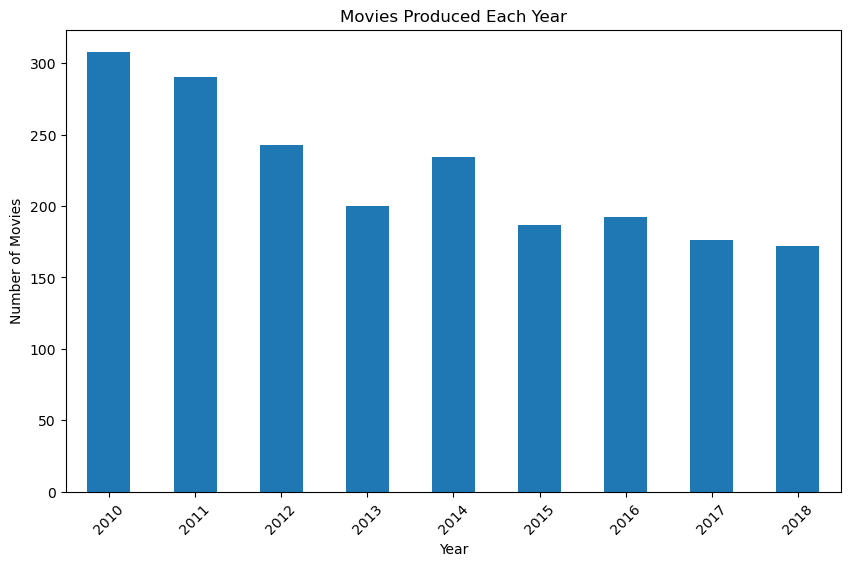

In [47]:

# Group the data by 'year' and count the number of movies in each year
movies_per_year = df_movie_gross.groupby('year').size()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
movies_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Produced Each Year')
plt.xticks(rotation=45)
plt.show()


From the above Data we can conclude that movie production has been declining. We need to find out why? Is it that the revenues have been declining?  
## 2. Revenues
Let us check the domestic and foreign  revenues and how they were over the years

      domestic_gross  foreign_gross
year                               
2010    1.015274e+10    14369371098
2011    9.915690e+09    15662866996
2012    1.069786e+10    17002984997
2013    1.055885e+10    16580242298
2014    1.014798e+10    16956667698
2015    8.802869e+09    15154353099
2016    1.086969e+10    18981389300
2017    1.029077e+10    19928931997
2018    1.008556e+10    17474489200


<Figure size 1000x600 with 0 Axes>

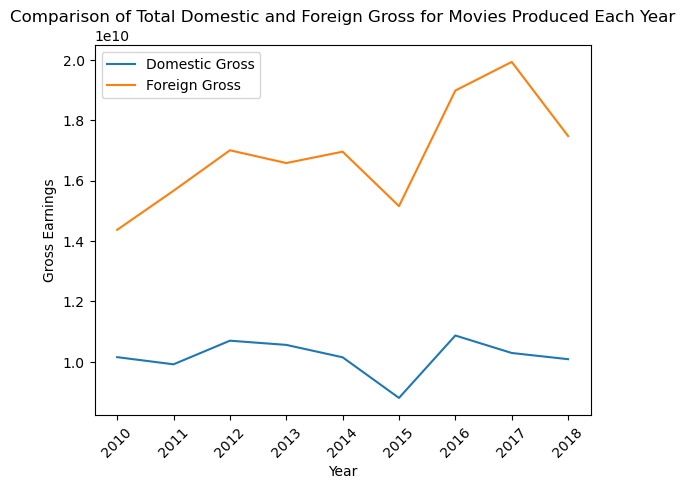

In [48]:
# Group the data by 'year' and calculate the sum of 'domestic_gross' and 'foreign_gross' for each year
gross_per_year = df_movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

print(gross_per_year)
# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
gross_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.title('Comparison of Total Domestic and Foreign Gross for Movies Produced Each Year')
plt.xticks(rotation=45)
plt.legend(['Domestic Gross', 'Foreign Gross'], loc='upper left')
plt.show()

From the above data we can conclude that the gross revenue for movies in the domestic market has been growing fast but there was a sharp decrease between 2017 and 2018.although it decreased, the domestic gross was relatively high compared to 8 years back. In the other hand revenues in the  foreign markets has been growing gradually with no significant change.

## 3. Competition

Lets take a look at the highest grossing top 10 studios:


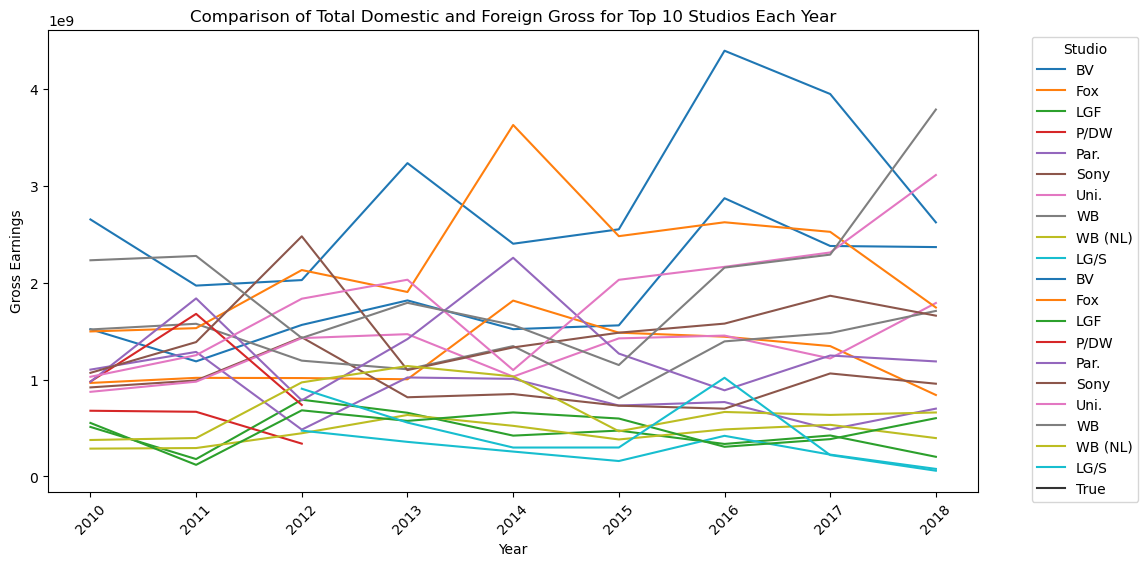

In [52]:
# Group the data by 'year' and 'studio' and calculate the sum of 'domestic_gross' and 'foreign_gross' for each year and studio
gross_per_year_studio = df_movie_gross.groupby(['year', 'studio'])[['domestic_gross', 'foreign_gross']].sum().reset_index()

# Get the top 10 studios based on total domestic gross
top_10_studios = gross_per_year_studio.groupby('studio')['domestic_gross'].sum().nlargest(10).index

# Filter the data for the top 30 studios
filtered_data = gross_per_year_studio[gross_per_year_studio['studio'].isin(top_10_studios)]

# Plotting the comparison using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='year', y='domestic_gross', hue='studio', ci=None)
sns.lineplot(data=filtered_data, x='year', y='foreign_gross', hue='studio', style=True, ci=None, errorbar=None)
plt.xlabel('Year')
plt.ylabel('Gross Earnings')
plt.title('Comparison of Total Domestic and Foreign Gross for Top 10 Studios Each Year')
plt.xticks(rotation=45)
plt.legend(title='Studio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the line graph above we can see the biggest competition was Buena Vista which is owned by Disney World. But in the year 2017 the was a sharp fall in the total gross for BV but in the same year Warner Bros gross grew by 1.6*10^9. We can then deduce that WB and Universal Pictures are currently the major competitors. 

## 4.Market Share

Here we will take a look at the market share for the highest grossing studios in both the domestic and foreign markets.Lets start with the:  

#### Domestic Market :


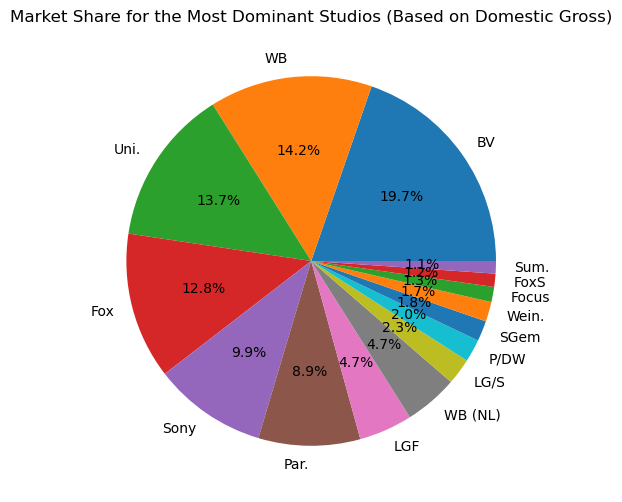

In [53]:
# Calculate the total domestic gross for each studio
studio_domestic_gross = df_movie_gross.groupby('studio')['domestic_gross'].sum()

# Get the most dominant studios based on total domestic gross
top_studios = studio_domestic_gross.nlargest(15)  # Adjust the number as per your preference

# Calculate the market share percentage for the most dominant studios
market_share = (top_studios / top_studios.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%')
plt.title('Market Share for the Most Dominant Studios (Based on Domestic Gross)')
plt.show()







From the piechart above we can see Buena Vista at 19.7%, controls the domestic market, then closely followed by Warner Bros,Universal pictures, Fox and Sony at 9.9%.

#### Foreign Market

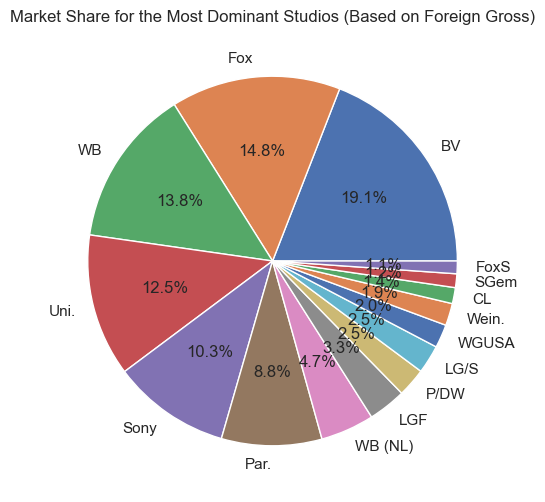

In [246]:
# Calculate the total foreign gross for each studio
studio_foreign_gross = df_movie_gross.groupby('studio')['foreign_gross'].sum()

# Get the most dominant studios based on total foreign gross
top_studios = studio_foreign_gross.nlargest(15)  # Adjust the number as per your preference

# Calculate the market share percentage for the most dominant studios
market_share = (top_studios / top_studios.sum()) * 100

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%')
plt.title('Market Share for the Most Dominant Studios (Based on Foreign Gross)')
plt.show()

From the piechart above we can see Buena Vista at 19.1%, controls the foreign market, then closely followed by Fox, WB, Universal Pictures and Sony at 10.3%.

#### Total Market Share

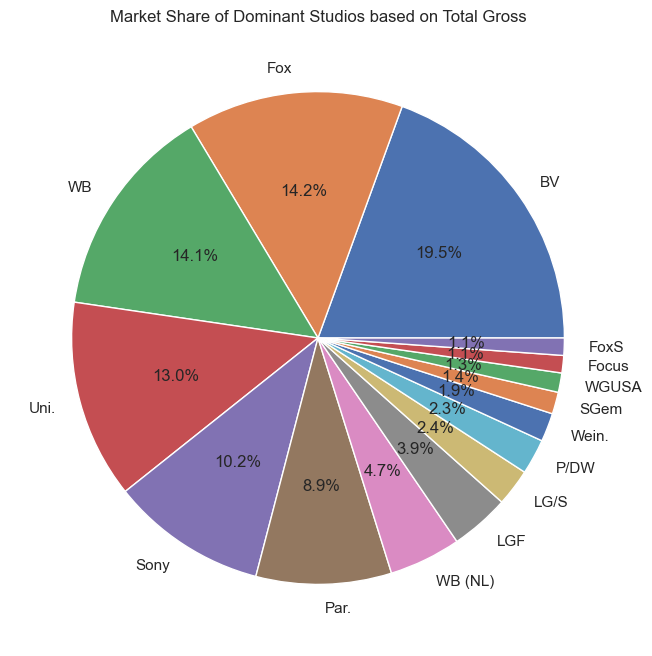

In [248]:
# Group the data by 'studio' and calculate the sum of 'domestic_gross' and 'foreign_gross' for each studio
gross_per_studio = df_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()

# Calculate the total gross for each studio by summing the domestic and foreign gross
gross_per_studio['total_gross'] = gross_per_studio['domestic_gross'] + gross_per_studio['foreign_gross']

# Sort the studios based on total gross in descending order
sorted_studios = gross_per_studio.sort_values(by='total_gross', ascending=False)

# Select the top 15 most dominant studios
top_studios = sorted_studios.head(15)

# Calculate the market share as a percentage
market_share = top_studios['total_gross'] / top_studios['total_gross'].sum() * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(market_share, labels=top_studios.index, autopct='%1.1f%%')
plt.title('Market Share of Dominant Studios based on Total Gross')
plt.show()


From the piechart above we can see Buena Vista at 19.5%, controls the total market share, then closely followed by Fox, WB, Universal Pictures and Sony at 10.2%.

# Phase 2:



In this phase we will look at customer satisfaction,let us start by  loading the data we need, we will be using title basics csv and movie rating csv and combine the date on a common key:

In [54]:
#Opening title.basics.csv
df_movie_title_basics = pd.read_csv("./data./title.basics.csv")
#Opening  title.ratings.csv
df_movie_ratings = pd.read_csv("./data./title.ratings.csv")

# Merge the dataframes based on the common 'tconst' column
combined_df = pd.merge(df_movie_title_basics, df_movie_ratings, on='tconst', how='inner')

#clean the data to remove na values
combined_df.dropna()

# Display the combined dataframe
print(combined_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


#### What is the most popular genre?

In [55]:
# Split the genres column by ',' to create a list of genres
combined_df['genres'] = combined_df['genres'].str.split(',')

# Create a new dataframe to hold the exploded genre values
df_genres = combined_df.explode('genres')

# Group the data by genre and calculate the total number of votes
genre_votes = df_genres.groupby('genres')['numvotes'].sum()

# Find the genre with the highest total number of votes
most_popular_genre = genre_votes.idxmax()

# Display the most popular genre
print("The most popular genre is:", most_popular_genre)

The most popular genre is: Drama


#### The top 10 most popular genres are:

In [56]:

# Group the data by genre and calculate the sum of 'numvotes' for each genre
popular_genres = df_genres.groupby('genres')['numvotes'].sum().sort_values(ascending=False).head(10)

# Display the 10 most popular genres
print(popular_genres)

genres
Drama        119567500
Action       101161682
Adventure     84232589
Comedy        74305805
Thriller      48155313
Sci-Fi        42960289
Crime         39631356
Romance       26913873
Fantasy       26335704
Mystery       24657286
Name: numvotes, dtype: int64


The most popular genre is Drama folllowed by Action. This explains why BV and Fox control the market share

#### A Pie Chart Showing Most Popular Movie Genre 

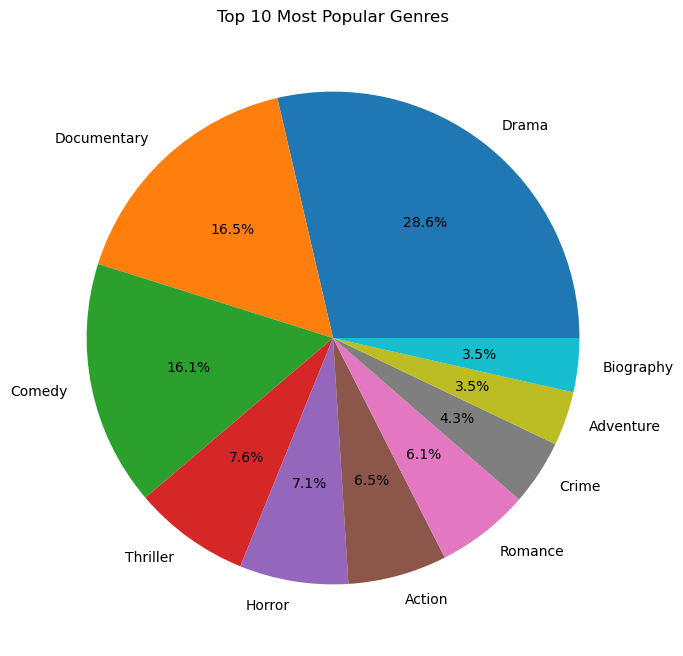

In [59]:
# Group the data by genre and calculate the count of movies in each genre

genre_counts = df_genres.groupby('genres')['tconst'].count().sort_values(ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Most Popular Genres')
plt.ylabel('')

# Display the pie chart
plt.show()

The most popular genre is Drama at 28.6% folllowed by Documentary at 16.5%. We can then see the most popular genre is drama with double the amount of popularity vs its competitor.

#### Top 20 Highest rated movies

In [60]:
# Sort the dataframe by 'averagerating' column in descending order
sorted_df = combined_df.sort_values('averagerating', ascending=False)

# Select the top 20 highest rated primary titles
top_20_titles = sorted_df.head(30)

# Display the top 20 titles
print(top_20_titles)

           tconst                                      primary_title   
51109   tt5089804                    Fly High: Story of the Disc Dog  \
65944   tt7259300                                     Calamity Kevin   
71577   tt8730716                      Pick It Up! - Ska in the '90s   
73616   tt9715646                                           Renegade   
65755   tt7227500  Ellis Island: The Making of a Master Race in A...   
878    tt10378660          The Dark Knight: The Ballad of the N Word   
64646   tt6991826    A Dedicated Life: Phoebe Brand Beyond the Group   
9745    tt1770682                               Freeing Bernie Baran   
702    tt10176328     Exteriores: Mulheres Brasileiras na Diplomacia   
49925   tt4944240                          Dog Days in the Heartland   
53408   tt5344358                                      All Around Us   
42970   tt4109192                              I Was Born Yesterday!   
27335   tt2632430                              Hercule contre He

#### A Bar Chart of the top 20 highest rated primary titles

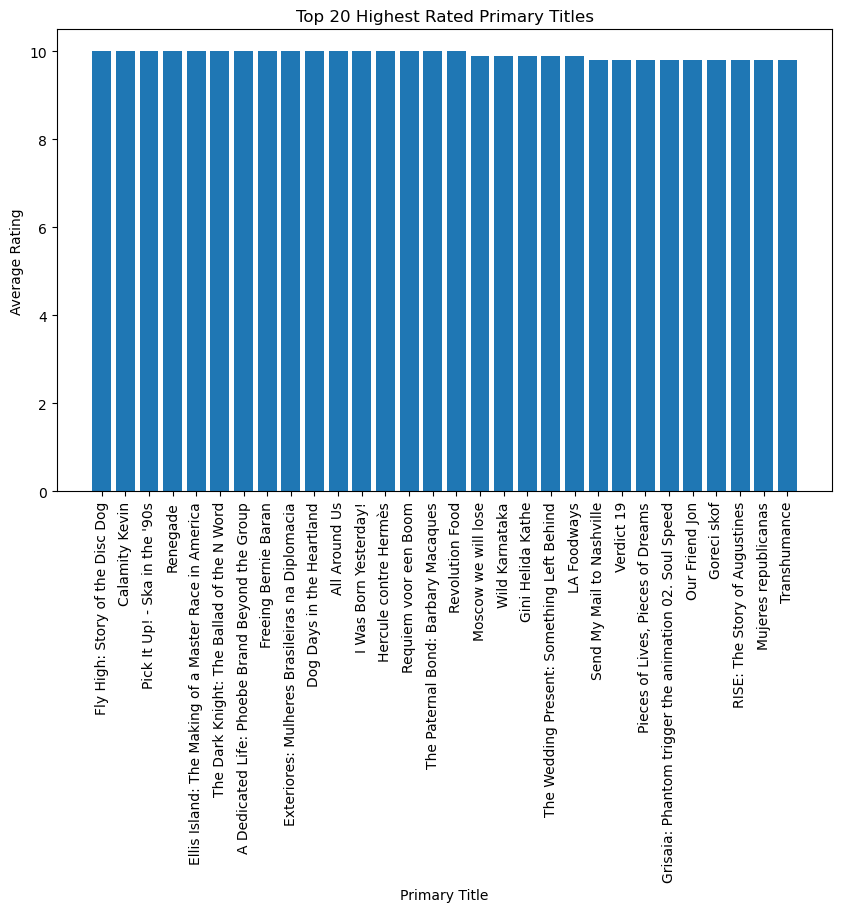

In [61]:
# Plot a bar chart of the top 20 highest rated primary titles
plt.figure(figsize=(10, 6))
plt.bar(top_20_titles['primary_title'], top_20_titles['averagerating'])
plt.xlabel('Primary Title')
plt.ylabel('Average Rating')
plt.title('Top 20 Highest Rated Primary Titles')
plt.xticks(rotation=90)
plt.show()

RECOMMENDATIONS

I would suggest that if you were to choose a specific genre of movies to produce I would lean in on the Family Movies. This is because from the findings we can see that Drama at 28.6%, is the most popular category. Also the leading production film company is Buena Vista. 
If you are targetting a specific set of audience you might want to consider the Documentary category which is the second most popular with 16.5%. This market is not that dominated by major companies like Fox, WB, Universal Pictures and Sony thus unregulated.
Also comedy movies have proven to be doing well with the audience at 16.1% following closely behind Documentary. This is relative with the Drama category.

From the above Data we can conclude that movie production has been declining over the years.This is because of the decrease in domestic gross. Also the market seems to be stagnant with the foreign gross not growing. This might be caused by audience prefference against number of movies produced. We have seen that audience loves drama the most but the market is monopoly controlled by BV. This can be solved by saturating the market with movies based on drama together with comedy.

In the top 20 rated titles we can see that there are major English titles appearring in top 10. This might be because of the huge American audience. At no 9,13,14,20 is where Spanish titles appear respectively. This is a clear indicator that the type of movies to produce should be in English and Spanish. But there is an exception of a Slovenian title at no 17. This shows there is an Asian audience.

CONCLUSION

Drama, Documentary, Comedy, Thriller are the most popular genres for the audience.
We can conclude that movie production has been declining over the years because of production companies not meeting the needs of the audience.
We can wind up by saying that the top languages are English, Spanish, Slovenian.